In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\AppData\Local\Temp\ipykernel_23068\423033545.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
df = pd.read_csv('homicide_by_countries.csv')
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [6]:
df.shape

(195, 6)

In [6]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [7]:
df.describe()

,Rate,Count,Year
count,195.000000,195.000000,195.000000
mean,6.845128,1942.800000,2017.420513
std,9.600060,6553.343376,3.589445
min,0.000000,0.000000,2006.000000
25%,1.100000,28.000000,2016.000000
50%,2.600000,128.000000,2019.000000
75%,7.850000,785.000000,2020.000000
max,49.300000,47722.000000,2021.000000


In [13]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [16]:
 df['Rate'] =  df['Rate'].astype(int)

In [8]:
my_list = ['Rate','Count','Year']
for i in  my_list:
 print(i)
df[i] = df[i].astype(int)

Rate
Count
Year


In [19]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [9]:
df1 = df.sort_values('Count', ascending = False).reset_index(drop = True)
df1

,Location,Region,Subregion,Rate,Count,Year
0,Brazil,Americas,South America,22.5,47722,2020
1,Nigeria,Africa,Western Africa,22.0,44200,2019
2,India,Asia,Southern Asia,3.0,40651,2020
3,Mexico,Americas,Central America,28.4,36579,2020
4,United States,Americas,Northern America,6.5,21570,2020
...,...,...,...,...,...,...
190,Holy See,Europe,Southern Europe,0.0,0,2015
191,Channel Islands,Europe,Northern Europe,0.0,0,2010
192,Saint Helena,Africa,Western Africa,0.0,0,2009
193,San Marino,Europe,Southern Europe,0.0,0,2011


In [10]:
df1 = df[['Location','Count']].sort_values(by='Count',ascending = False).head(5)

df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


In [11]:
df1.Location

26            Brazil
125          Nigeria
78             India
111           Mexico
186    United States
Name: Location, dtype: object

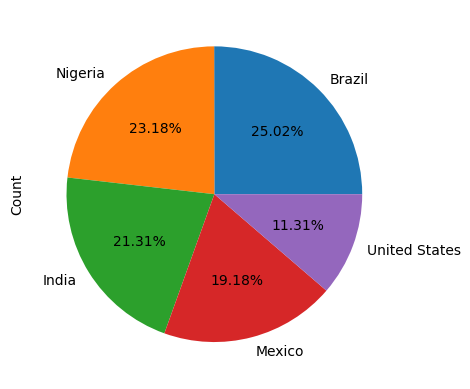

In [68]:
df1 .plot(x = 'Location' , y = 'Count' , kind = 'pie' , labels = df1.Location , autopct = '%1.2f%%' )
plt.legend().set_visible(False)

In [12]:
df2 = df.groupby('Region')['Count'].sum()
df2

Region
Africa       99481
Americas    153597
Asia        105552
Europe       19869
Oceania        347
Name: Count, dtype: int64

In [13]:
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending = False)
df2

Region
Americas    153597
Asia        105552
Africa       99481
Europe       19869
Oceania        347
Name: Count, dtype: int64

<Axes: xlabel='Region'>

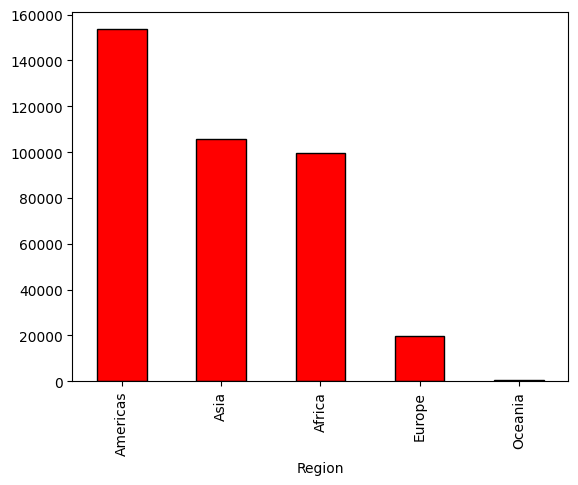

In [64]:
df2.plot(kind ='bar',color = 'red' , edgecolor = 'black')

In [14]:
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending = False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

In [53]:
df3.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [54]:
df3.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347], dtype=int64)

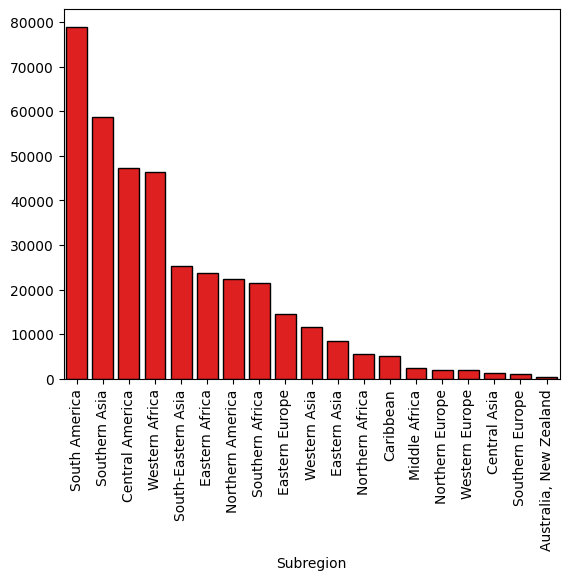

In [63]:
sns.barplot(x = df3.index , y = df3.values ,color = 'red' , edgecolor = 'black')
plt.xticks(rotation = 'vertical')
xlabel = None

In [20]:
df.Year.value_counts

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [21]:
df[df['Region'].isin(['Asia' , 'Europe'])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
8,Armenia,Asia,Western Asia,1.8,52,2020
11,Austria,Europe,Western Europe,0.7,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0.7,64,2019
184,United Kingdom,Europe,Northern Europe,1.1,755,2018
189,Uzbekistan,Asia,Central Asia,1.2,396,2019
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011


In [25]:
df4 = df[(df['Region'] == 'Asia' )| (df['Region'] == 'Europe')]

In [28]:
df4[df4['Year']> 2016][['Region' , 'Year' , 'Count']]

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [29]:
 df4 =  df4.groupby(['Region','Year']).sum()['Count']
df4

Region  Year
Asia    2006      203
        2011     1626
        2012       61
        2013     5782
        2014     3029
        2015      241
        2016      627
        2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2010        1
        2011        0
        2015        0
        2016        0
        2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

<Axes: xlabel='Region,Year'>

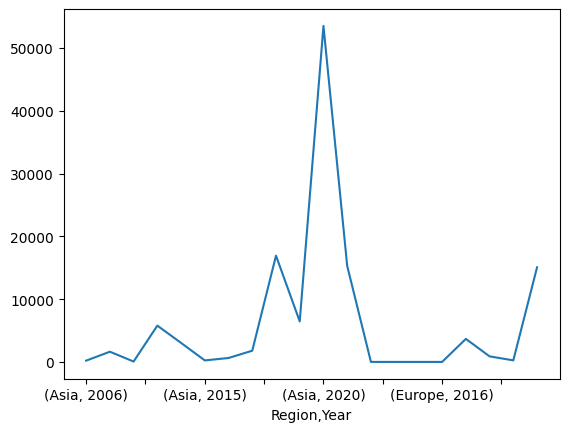

In [30]:
df4.plot(kind = 'line')

In [32]:
df_unstacked = df4.unstack(level = 0)
df_unstacked

Region,Asia,Europe
Year,,
2006,203.0,NaN
2010,NaN,1.0
2011,1626.0,0.0
2012,61.0,NaN
2013,5782.0,NaN
2014,3029.0,NaN
2015,241.0,0.0
2016,627.0,0.0
2017,1787.0,3670.0


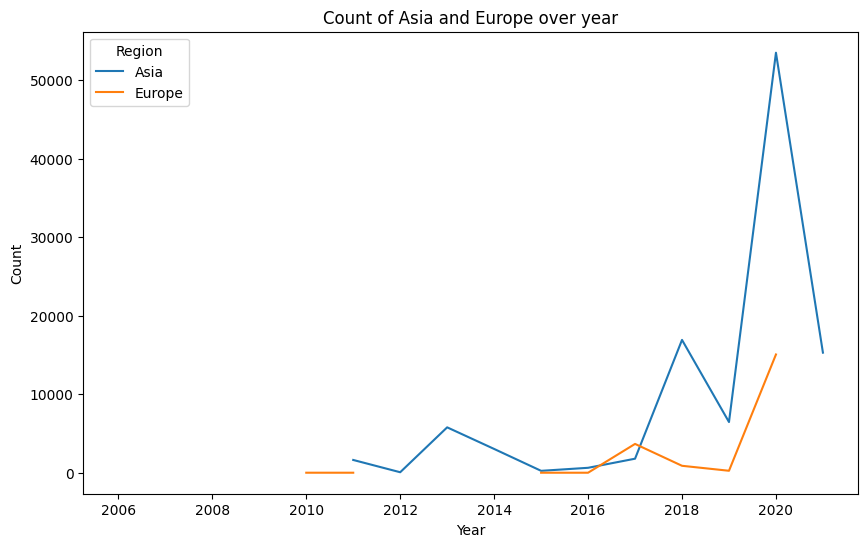

In [42]:
df_unstacked.plot(kind = 'line' , figsize = (10,6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Asia and Europe over year')
plt.show()

In [43]:
df5 = df.groupby(['Year'])['Rate'].sum().sort_values(ascending = False)
df5

Year
2020    608.0
2019    161.0
2012    119.5
2016     78.8
2018     70.0
2015     58.5
2014     54.2
2009     39.5
2017     30.3
2021     28.4
2013     21.7
2007     19.0
2010     18.2
2006     12.5
2011     10.1
2008      5.1
Name: Rate, dtype: float64

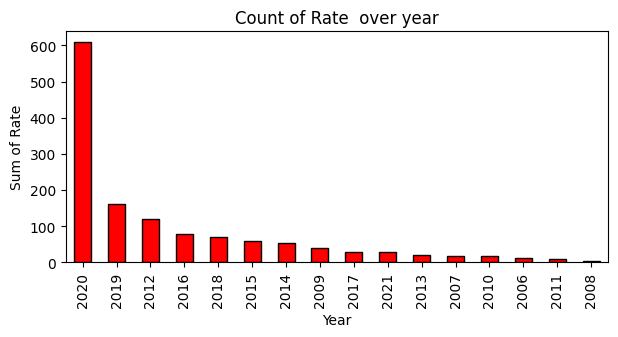

In [49]:
df5.plot(kind = 'bar' , figsize = (7,3) , color = 'red' , edgecolor = 'black')
plt.xlabel('Year')
plt.ylabel('Sum of Rate')
plt.title('Count of Rate  over year')
plt.show()


In [55]:
df6 = df[['Year','Region','Count']]
df6 = df6.groupby(['Year','Region']).sum().sort_values(by = 'Year' ,ascending = False).head(40)
df6

Count
Year Region          
2021 Asia       15299
2020 Oceania      221
     Europe     15066
     Asia       53516
     Americas  134784
     Africa     28460
2019 Asia        6458
     Africa     44210
     Americas    4276
     Europe       249
     Oceania      126
2018 Europe       883
     Asia       16923
     Americas   13793
2017 Europe      3670
     Asia        1787
     Africa      1467
2016 Americas     608
     Europe         0
     Asia         627
     Africa      4987
2015 Asia         241
     Africa      2206
     Europe         0
2014 Asia        3029
     Americas      13
2013 Asia        5782
2012 Africa     15264
     Asia          61
     Americas      53
2011 Asia        1626
     Africa       855
     Europe         0
2010 Europe         1
     Africa       303
2009 Americas      42
     Africa        27
2008 Africa      1702
2007 Americas      26
2006 Asia         203

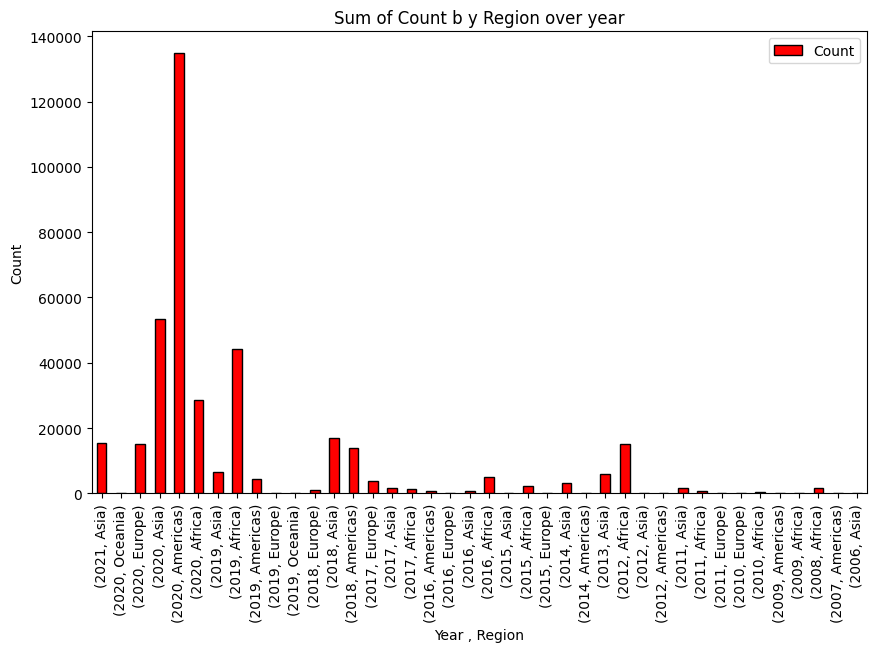

In [60]:
df6.plot(kind = 'bar', figsize = (10,6) , color = 'Red' , edgecolor = 'black' )
plt.xlabel('Year , Region')
plt.ylabel('Count')
plt.title('Sum of Count b y Region over year')
plt.show()

In [69]:
df7 = df.groupby('Subregion')['Count'].mean().sort_values(ascending = False).round(2)
df7

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [71]:
df7.index

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [72]:
df7.values

array([6514.56, 6067.08, 5921.38, 4463.4 , 4295.8 , 4210.73, 2531.4 ,
       1577.93, 1460.4 , 1223.29, 1107.6 ,  619.25,  581.9 ,  281.2 ,
        230.56,  201.48,  173.5 ,  139.8 ,   64.29])

In [73]:
data = {
    'Category':df7.index,
    'Values' : df7.values,
     'Info' : df7.values
}
df = pd.DataFrame(data)
df

,Category,Values,Info
0,Southern Asia,6514.56,6514.56
1,South America,6067.08,6067.08
2,Central America,5921.38,5921.38
3,Northern America,4463.40,4463.40
4,Southern Africa,4295.80,4295.80
5,Western Africa,4210.73,4210.73
6,South-Eastern Asia,2531.40,2531.40
7,Eastern Africa,1577.93,1577.93
8,Eastern Europe,1460.40,1460.40
9,Eastern Asia,1223.29,1223.29


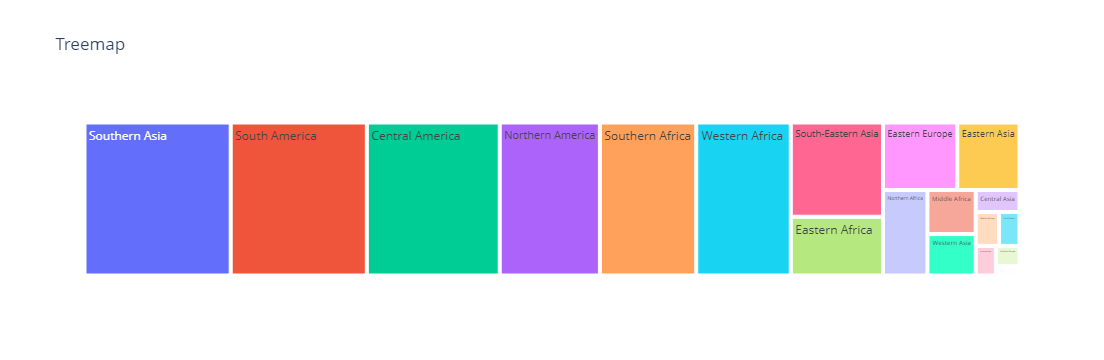

In [82]:
fig = px.treemap(df, path=['Category'], values='Values', title='Treemap')

fig.show()